In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/gym_members_exercise_tracking (1).csv')

In [ ]:
df.head()

Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0   56    Male         88.3        1.71      180      157           60   
1   46  Female         74.9        1.53      179      151           66   
2   32  Female         68.1        1.66      167      122           54   
3   25    Male         53.2        1.70      190      164           56   
4   38    Male         46.1        1.79      188      158           68   

   Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
0                      1.69           1313.0         Yoga            12.6   
1                      1.30            883.0         HIIT            33.9   
2                      1.11            677.0       Cardio            33.4   
3                      0.59            532.0     Strength            28.8   
4                      0.64            556.0     Strength            29.2   

   Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
0                    3.5                              4                 3   
1                    2.1                              4                 2   
2                    2.3                              4                 2   
3                    2.1                              3                 1   
4                    2.8                              3                 1   

     BMI  
0  30.20  
1  32.00  
2  24.71  
3  18.41  
4  14.39

In [ ]:
df.shape

(973, 15)

In [ ]:
df.columns

Index(['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
       'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI'],
      dtype='object')

In [ ]:
df.isnull().sum()

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df['Workout_Type'].value_counts()

Workout_Type
2    258
0    255
3    239
1    221
Name: count, dtype: int64

In [ ]:
df['BMI'].value_counts()

BMI
23.53    5
22.48    4
23.79    4
24.31    4
26.47    4
        ..
29.23    1
31.74    1
22.99    1
48.43    1
20.07    1
Name: count, Length: 771, dtype: int64

In [ ]:
df.describe()

Age  Weight (kg)  Height (m)     Max_BPM     Avg_BPM  \
count  973.000000   973.000000   973.00000  973.000000  973.000000   
mean    38.683453    73.854676     1.72258  179.883864  143.766701   
std     12.180928    21.207500     0.12772   11.525686   14.345101   
min     18.000000    40.000000     1.50000  160.000000  120.000000   
25%     28.000000    58.100000     1.62000  170.000000  131.000000   
50%     40.000000    70.000000     1.71000  180.000000  143.000000   
75%     49.000000    86.000000     1.80000  190.000000  156.000000   
max     59.000000   129.900000     2.00000  199.000000  169.000000   

       Resting_BPM  Session_Duration (hours)  Calories_Burned  Fat_Percentage  \
count   973.000000                973.000000       973.000000      973.000000   
mean     62.223022                  1.256423       905.422405       24.976773   
std       7.327060                  0.343033       272.641516        6.259419   
min      50.000000                  0.500000       303.000000       10.000000   
25%      56.000000                  1.040000       720.000000       21.300000   
50%      62.000000                  1.260000       893.000000       26.200000   
75%      68.000000                  1.460000      1076.000000       29.300000   
max      74.000000                  2.000000      1783.000000       35.000000   

       Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
count             973.000000                     973.000000        973.000000   
mean                2.626619                       3.321686          1.809866   
std                 0.600172                       0.913047          0.739693   
min                 1.500000                       2.000000          1.000000   
25%                 2.200000                       3.000000          1.000000   
50%                 2.600000                       3.000000          2.000000   
75%                 3.100000                       4.000000          2.000000   
max                 3.700000                       5.000000          3.000000   

              BMI  
count  973.000000  
mean    24.912127  
std      6.660879  
min     12.320000  
25%     20.110000  
50%     24.160000  
75%     28.560000  
max     49.840000

In [ ]:
df.dtypes

Age                                int64
Gender                            object
Weight (kg)                      float64
Height (m)                       float64
Max_BPM                            int64
Avg_BPM                            int64
Resting_BPM                        int64
Session_Duration (hours)         float64
Calories_Burned                  float64
Workout_Type                      object
Fat_Percentage                   float64
Water_Intake (liters)            float64
Workout_Frequency (days/week)      int64
Experience_Level                   int64
BMI                              float64
dtype: object

In [ ]:
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Workout_Type'] = le.fit_transform(df['Workout_Type'])


In [ ]:
df.corr()

Age    Gender  Weight (kg)  Height (m)  \
Age                            1.000000  0.027175    -0.036340   -0.027837   
Gender                         0.027175  1.000000     0.579340    0.583503   
Weight (kg)                   -0.036340  0.579340     1.000000    0.365321   
Height (m)                    -0.027837  0.583503     0.365321    1.000000   
Max_BPM                       -0.017073  0.010245     0.057061   -0.017660   
Avg_BPM                        0.035969  0.009648     0.009717   -0.014776   
Resting_BPM                    0.004354  0.014062    -0.032138   -0.005090   
Session_Duration (hours)      -0.019912 -0.012200    -0.013666   -0.010206   
Calories_Burned               -0.154679  0.150646     0.095443    0.086348   
Workout_Type                   0.044296  0.035473    -0.028724    0.037712   
Fat_Percentage                 0.002370 -0.407309    -0.225512   -0.235521   
Water_Intake (liters)          0.041528  0.667658     0.394276    0.393533   
Workout_Frequency (days/week)  0.008055 -0.018902    -0.011769   -0.011270   
Experience_Level              -0.018676  0.003224     0.003379   -0.010267   
BMI                           -0.013691  0.311970     0.853158   -0.159469   

                                Max_BPM   Avg_BPM  Resting_BPM  \
Age                           -0.017073  0.035969     0.004354   
Gender                         0.010245  0.009648     0.014062   
Weight (kg)                    0.057061  0.009717    -0.032138   
Height (m)                    -0.017660 -0.014776    -0.005090   
Max_BPM                        1.000000 -0.039751     0.036647   
Avg_BPM                       -0.039751  1.000000     0.059636   
Resting_BPM                    0.036647  0.059636     1.000000   
Session_Duration (hours)       0.010051  0.016014    -0.016649   
Calories_Burned                0.002090  0.339659     0.016518   
Workout_Type                   0.010061 -0.008206    -0.011013   
Fat_Percentage                -0.009056 -0.007302    -0.016834   
Water_Intake (liters)          0.031621 -0.002911     0.007726   
Workout_Frequency (days/week) -0.029099 -0.010681    -0.007967   
Experience_Level               0.000545 -0.000888     0.001758   
BMI                            0.067105  0.021605    -0.032543   

                               Session_Duration (hours)  Calories_Burned  \
Age                                           -0.019912        -0.154679   
Gender                                        -0.012200         0.150646   
Weight (kg)                                   -0.013666         0.095443   
Height (m)                                    -0.010206         0.086348   
Max_BPM                                        0.010051         0.002090   
Avg_BPM                                        0.016014         0.339659   
Resting_BPM                                   -0.016649         0.016518   
Session_Duration (hours)                       1.000000         0.908140   
Calories_Burned                                0.908140         1.000000   
Workout_Type                                   0.035443         0.018859   
Fat_Percentage                                -0.581520        -0.597615   
Water_Intake (liters)                          0.283411         0.356931   
Workout_Frequency (days/week)                  0.644140         0.576150   
Experience_Level                               0.764768         0.694129   
BMI                                           -0.006493         0.059761   

                               Workout_Type  Fat_Percentage  \
Age                                0.044296        0.002370   
Gender                             0.035473       -0.407309   
Weight (kg)                       -0.028724       -0.225512   
Height (m)                         0.037712       -0.235521   
Max_BPM                            0.010061       -0.009056   
Avg_BPM                           -0.008206       -0.007302   
Resting_BPM                       -0.011013       -0.016834   
Session_D

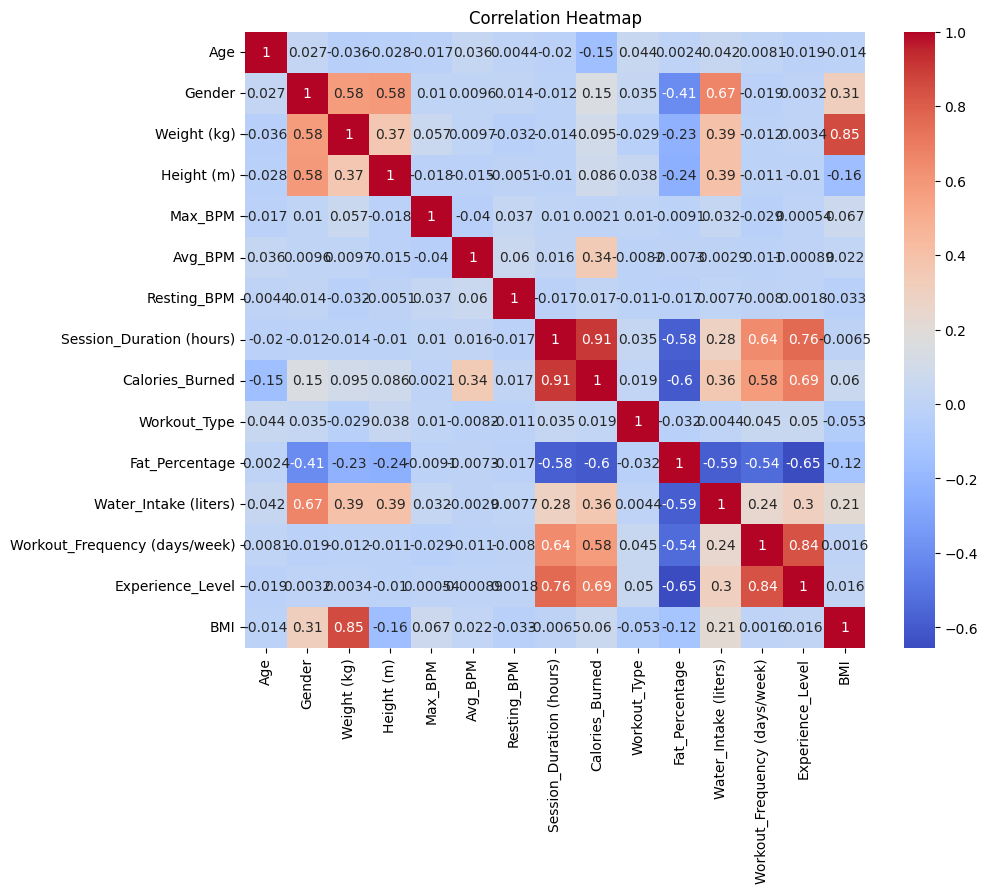

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
x = df.drop('Workout_Type', axis=1)
y = df['Workout_Type']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
lr = LinearRegression()
lr.fit(x_train, y_train)
print(lr.score(x_train, y_train))
print(lr.score(x_test, y_test))
print(mean_squared_error(y_test, lr.predict(x_test)))
print(r2_score(y_test, lr.predict(x_test)))

0.022803980313042094
-0.02954247353715811
1.3617306815010608
-0.02954247353715811


In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)
print(classification_report(y_test, tree.predict(x_test)))
print(tree.score(x_train, y_train))

              precision    recall  f1-score   support

           0       0.25      0.28      0.27        46
           1       0.31      0.40      0.35        42
           2       0.20      0.23      0.22        47
           3       0.29      0.17      0.21        60

    accuracy                           0.26       195
   macro avg       0.26      0.27      0.26       195
weighted avg       0.27      0.26      0.26       195

1.0


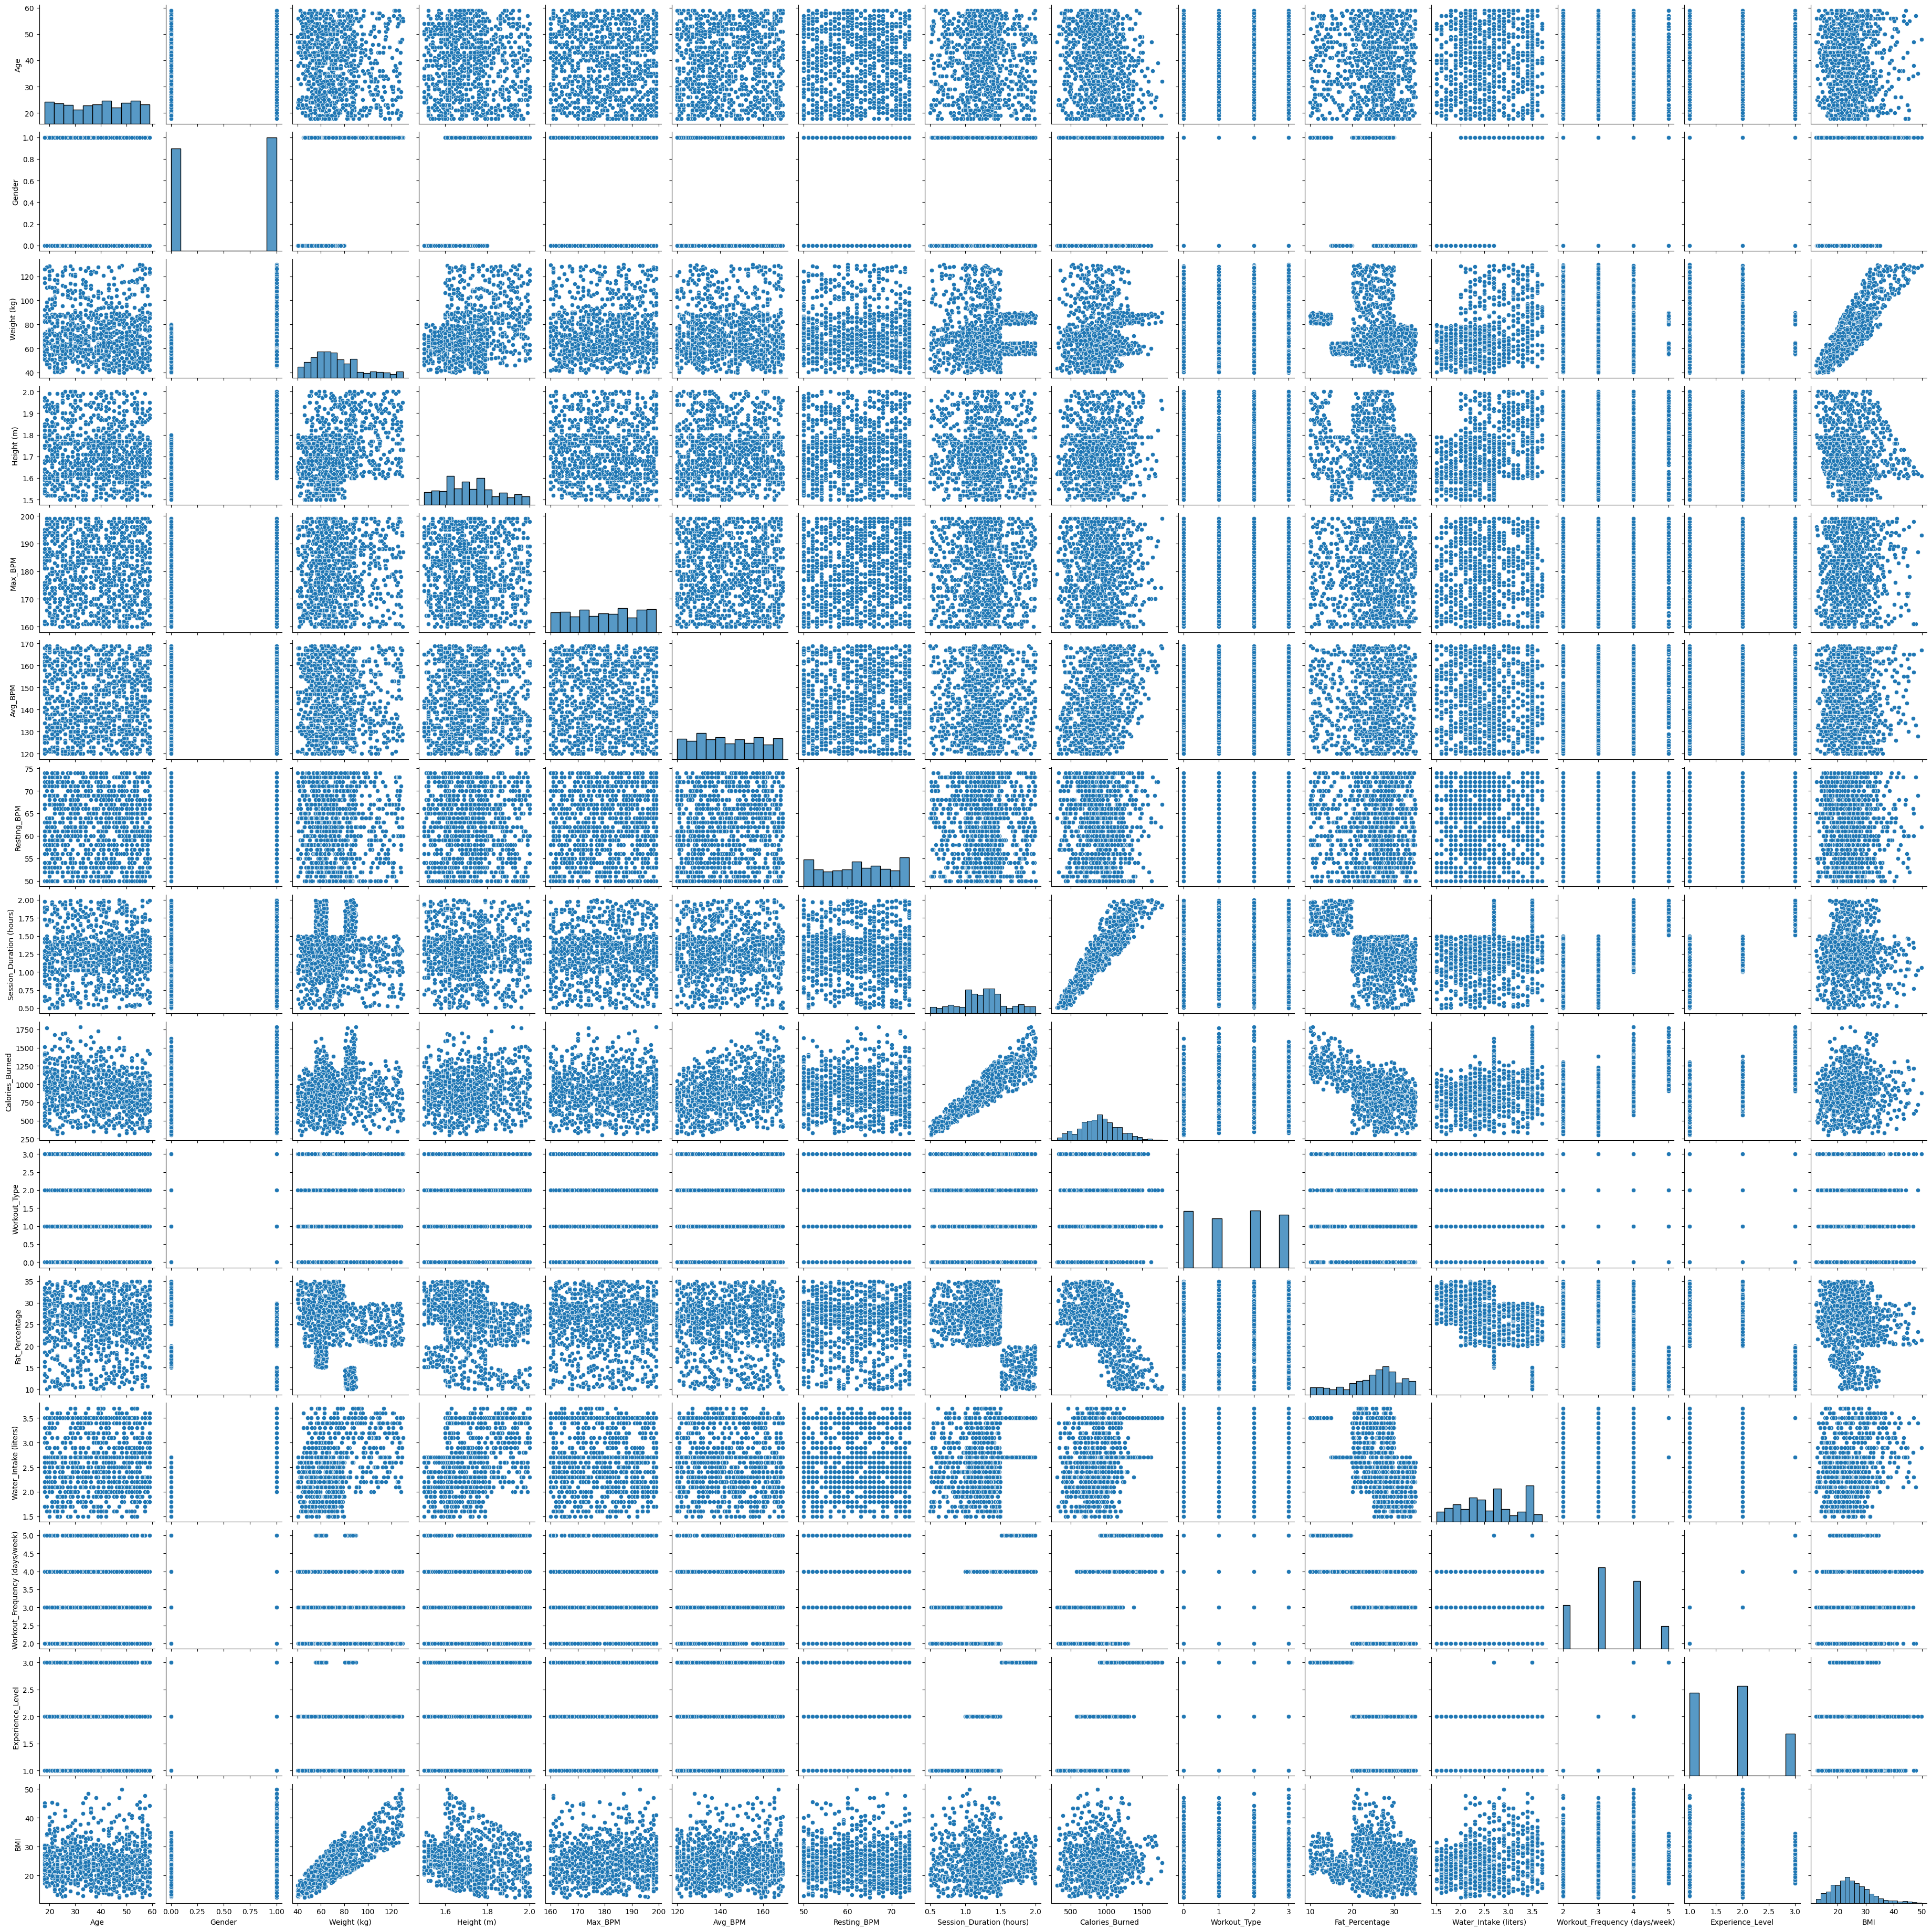

In [ ]:
sns.pairplot(df)
plt.show()

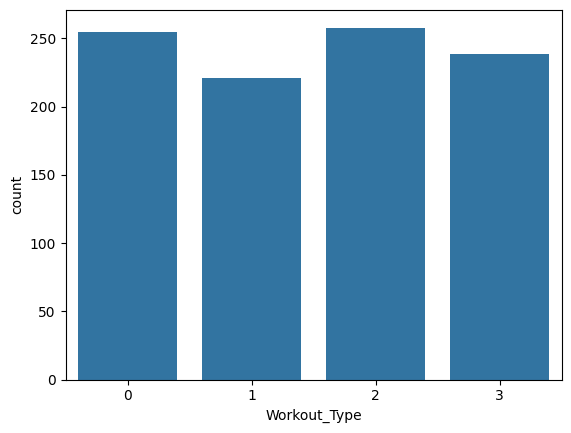

In [ ]:
sns.countplot(x='Workout_Type', data=df)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
random = RandomForestClassifier()
random.fit(x_train, y_train)

print(random.score(x_train, y_train))

1.0


In [ ]:
from sklearn.svm import SVC

In [ ]:
svm = SVC()
svm.fit(x_train, y_train)

print(svm.score(x_train, y_train))

0.2827763496143959


In [ ]:
from sklearn.svm import SVR

In [ ]:
sv = SVR()
sv.fit(x_train, y_train)

print(sv.score(x_train, y_train))

-0.034470624826243856


In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [ ]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
model.score(x_test, y_test)

0.2564102564102564

[Text(0.375, 0.9166666666666666, 'x[8] <= 464.0\ngini = 0.748\nsamples = 778\nvalue = [209, 179, 211, 179]'),
 Text(0.16071428571428573, 0.75, 'x[13] <= 20.09\ngini = 0.65\nsamples = 44\nvalue = [22, 5, 5, 12]'),
 Text(0.26785714285714285, 0.8333333333333333, 'True  '),
 Text(0.07142857142857142, 0.5833333333333334, 'x[6] <= 58.5\ngini = 0.685\nsamples = 18\nvalue = [5, 2, 3, 8]'),
 Text(0.03571428571428571, 0.4166666666666667, 'gini = 0.0\nsamples = 5\nvalue = [0, 0, 0, 5]'),
 Text(0.10714285714285714, 0.4166666666666667, 'x[8] <= 460.5\ngini = 0.722\nsamples = 13\nvalue = [5, 2, 3, 3]'),
 Text(0.07142857142857142, 0.25, 'x[0] <= 24.5\ngini = 0.74\nsamples = 10\nvalue = [2, 2, 3, 3]'),
 Text(0.03571428571428571, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.10714285714285714, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.14285714285714285, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [3, 0, 0, 0]'),
 Text(0.25, 0.5833333333333334, 'x[4] <= 181.0\ngini = 0.53\nsamples = 26\nvalue = [17, 3

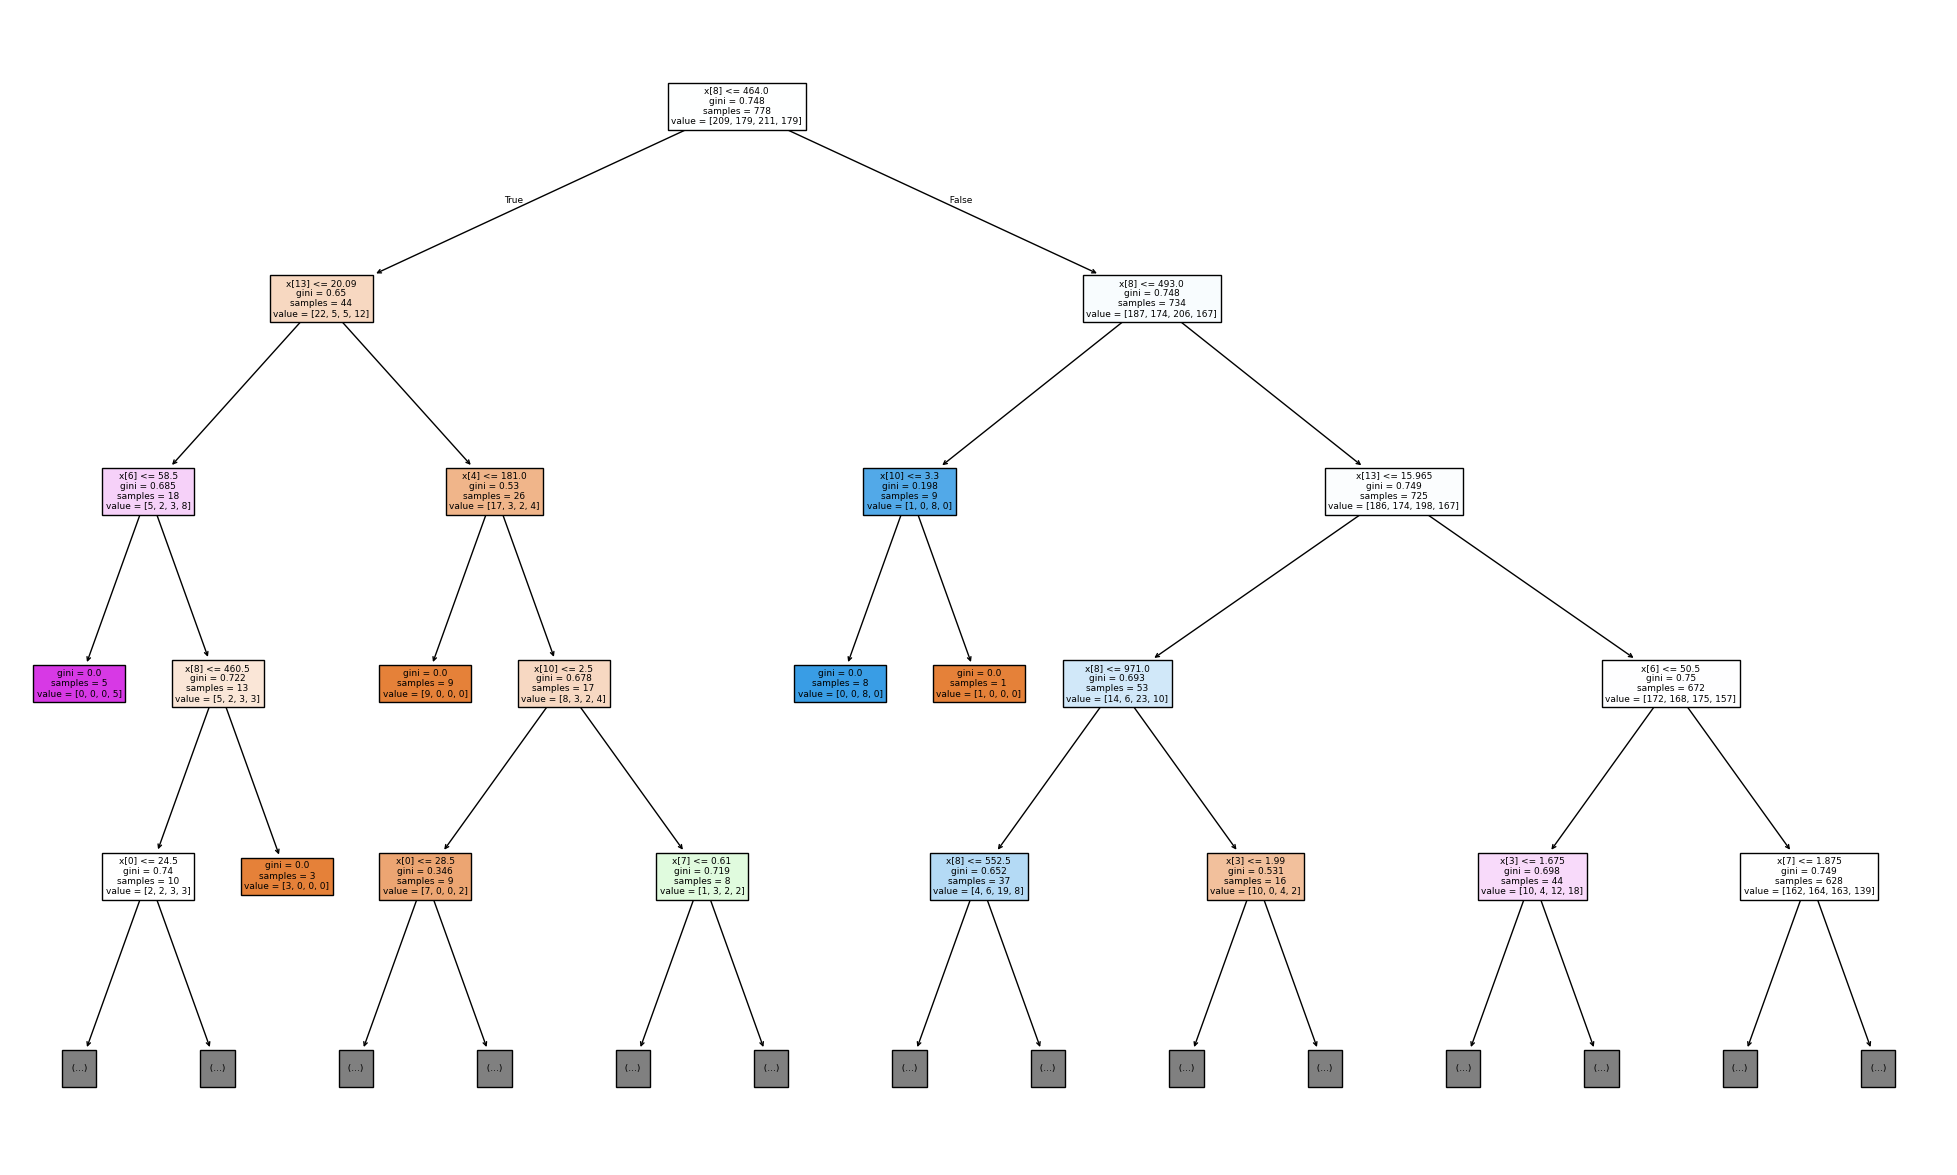

In [ ]:
from sklearn import tree
fig = plt.figure(figsize=(25,15))
tree.plot_tree(model, max_depth=4, filled=True)

In [ ]:
x_predict = model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test, x_predict)

0.2564102564102564

In [ ]:
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']


}

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = model, param_grid=grid_param, cv=3, verbose=1)

In [ ]:
grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 8640 candidates, totalling 25920 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']},
             verbose=1)

In [ ]:
grid_search = GridSearchCV(estimator = model, param_grid=grid_param, cv=3, verbose=3)

In [ ]:
grid_search.fit(x_train, y_train)

Streaming output truncated to the last 5000 lines.
[CV 2/3] END criterion=entropy, max_depth=20, min_samples_leaf=4, min_samples_split=8, splitter=random;, score=0.259 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=20, min_samples_leaf=4, min_samples_split=8, splitter=random;, score=0.212 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=20, min_samples_leaf=4, min_samples_split=9, splitter=best;, score=0.250 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=20, min_samples_leaf=4, min_samples_split=9, splitter=best;, score=0.251 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=20, min_samples_leaf=4, min_samples_split=9, splitter=best;, score=0.251 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=20, min_samples_leaf=4, min_samples_split=9, splitter=random;, score=0.281 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=20, min_samples_leaf=4, min_samples_split=9, splitter=random;, score=0.274 total time=   0.0s
[CV

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']},
             verbose=3)

In [ ]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 26,
 'min_samples_leaf': 1,
 'min_samples_split': 9,
 'splitter': 'random'}

In [ ]:
model_with_best_params = DecisionTreeClassifier(criterion= 'gini',max_depth= 26, min_samples_leaf= 1, min_samples_split= 9, splitter= 'random')

In [ ]:
model_with_best_params.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=26, min_samples_split=9, splitter='random')

[Text(0.7222697942323482, 0.975, 'x[2] <= 125.487\ngini = 0.748\nsamples = 778\nvalue = [209, 179, 211, 179]'),
 Text(0.5654344981527094, 0.925, 'x[10] <= 3.151\ngini = 0.749\nsamples = 760\nvalue = [205, 177, 201, 177]'),
 Text(0.6438521461925288, 0.95, 'True  '),
 Text(0.2714683394909688, 0.875, 'x[3] <= 1.576\ngini = 0.747\nsamples = 563\nvalue = [150.0, 120.0, 157.0, 136.0]'),
 Text(0.07471264367816093, 0.825, 'x[4] <= 171.633\ngini = 0.734\nsamples = 100\nvalue = [34, 25, 25, 16]'),
 Text(0.03284072249589491, 0.775, 'x[11] <= 4.77\ngini = 0.705\nsamples = 24\nvalue = [3, 10, 6, 5]'),
 Text(0.026272577996715927, 0.725, 'x[6] <= 69.852\ngini = 0.682\nsamples = 22\nvalue = [3, 10, 6, 3]'),
 Text(0.019704433497536946, 0.675, 'x[7] <= 1.49\ngini = 0.715\nsamples = 19\nvalue = [3, 7, 6, 3]'),
 Text(0.013136288998357963, 0.625, 'x[0] <= 27.624\ngini = 0.698\nsamples = 18\nvalue = [2, 7, 6, 3]'),
 Text(0.006568144499178982, 0.575, 'gini = 0.444\nsamples = 3\nvalue = [1, 2, 0, 0]'),
 Text(

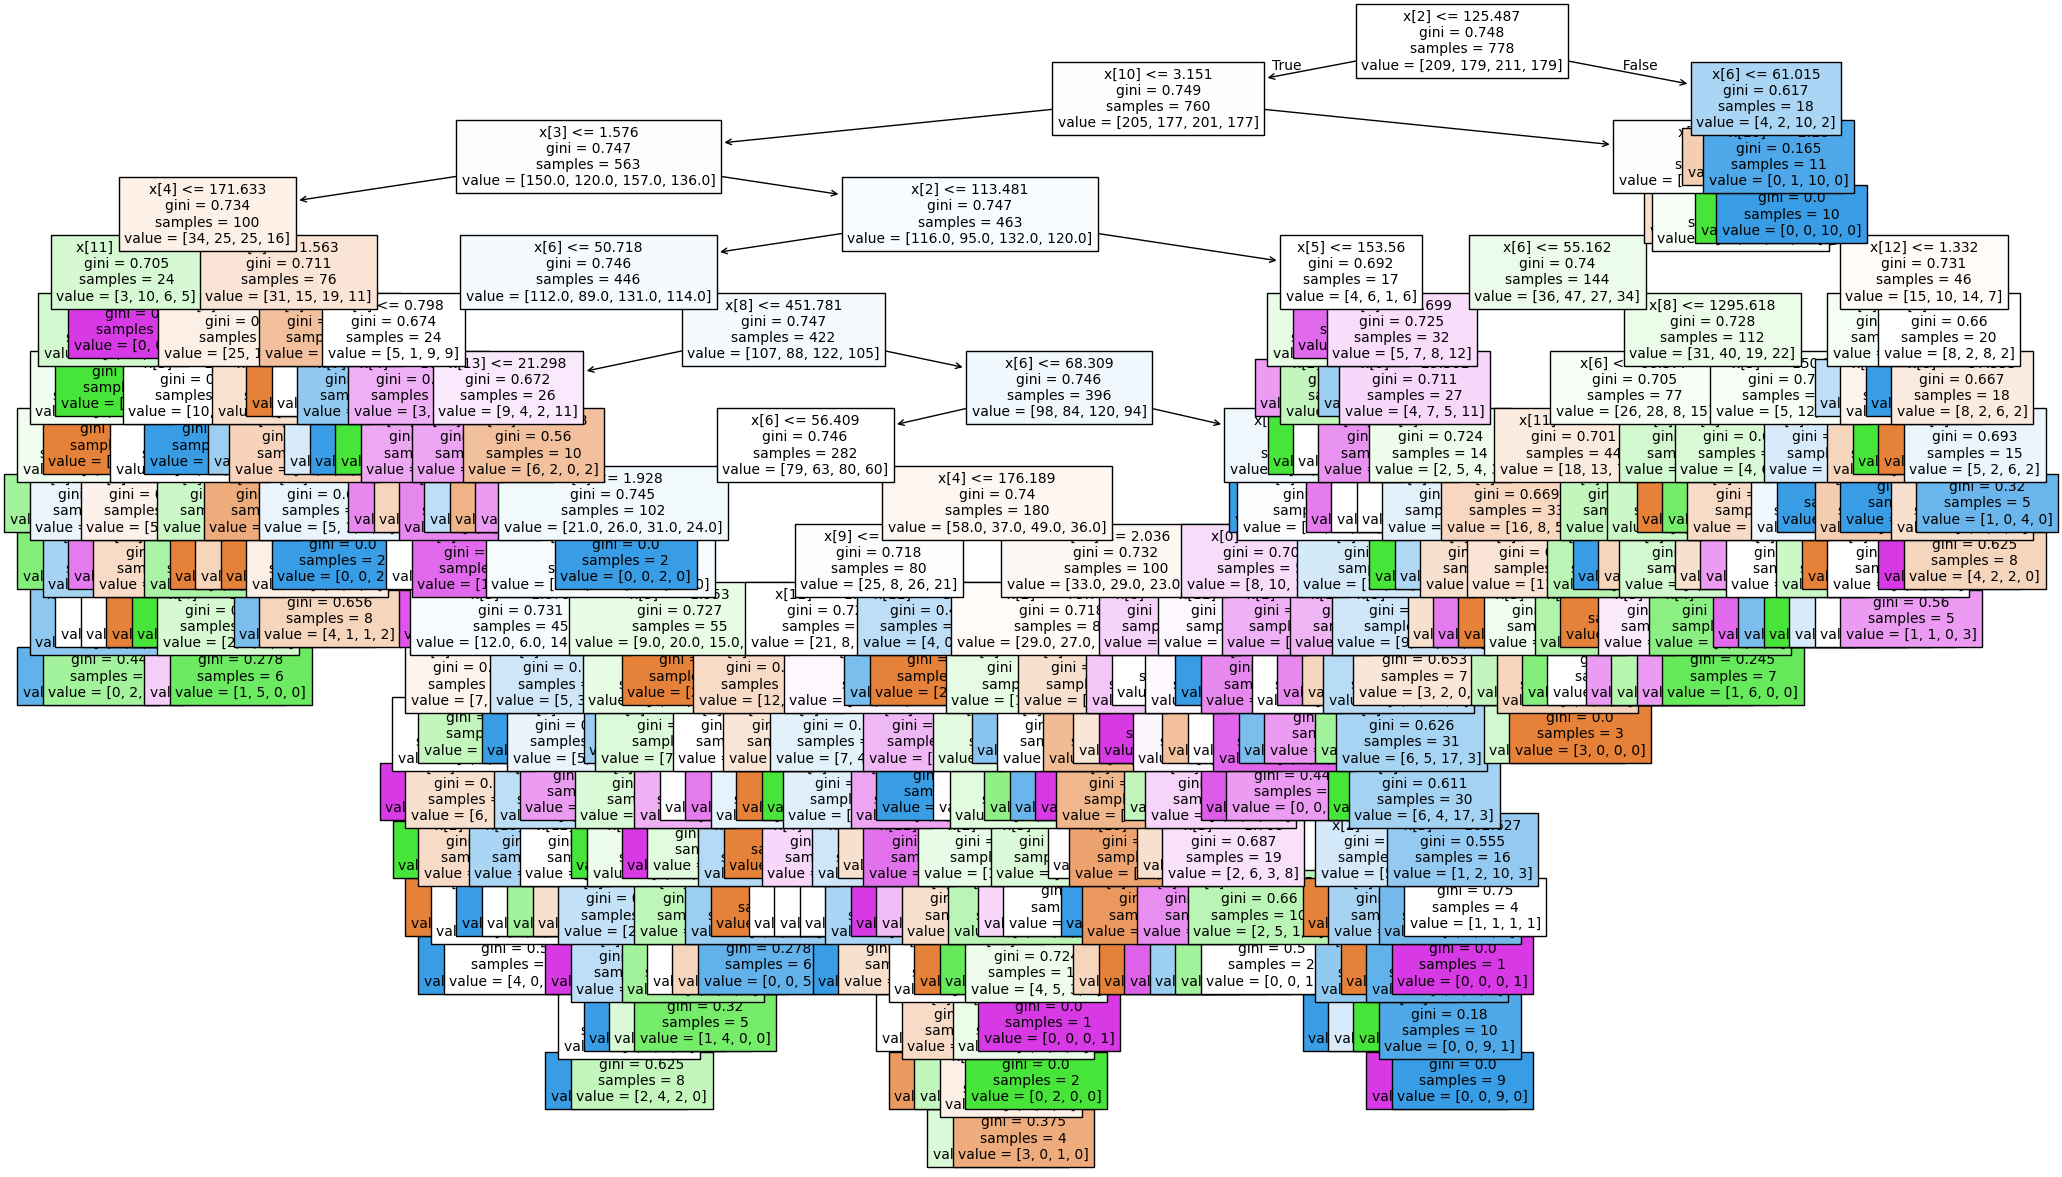

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25,15))
tree.plot_tree(model_with_best_params, filled=True,fontsize=10)

In [ ]:
y_prediction_with_best_params=model_with_best_params.predict(x_test)

In [ ]:
accuracy_score(y_test, y_prediction_with_best_params)

0.2717948717948718

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

print(knn.score(x_train, y_train))

0.5526992287917738
